In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [146]:
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd
import os

import warnings
warnings.filterwarnings("ignore")

In [147]:
import re

In [148]:
folder_path=dataiku.Folder("Name Screening notebooks").get_path()
file_path=os.path.join(folder_path,"Combined Data versions/Final_training_dataset_2_data_enh.csv")
file_path_test = os.path.join(folder_path, "Combined Data versions/enhanced_data_dec_test_results_with_predsid.csv")
df=pd.read_csv(file_path)
df_test = pd.read_csv(file_path_test)

In [149]:
df_test["FINAL_DOB_MATCH"].value_counts()

 0.0    17461
 0.6     2122
-1.0     1857
 0.5      437
 0.8      270
 1.0      238
Name: FINAL_DOB_MATCH, dtype: int64

In [3]:
df.shape

(810445, 151)

In [4]:
df_test.shape

(22385, 39)

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22385 entries, 0 to 22384
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    22385 non-null  int64  
 1   N_PARTY_WATCHLIST_MATCH_ID    22385 non-null  int64  
 2   V_CUST_DOB                    22385 non-null  object 
 3   V_DOB                         22385 non-null  object 
 4   V_DOB_2                       22385 non-null  object 
 5   V_AGE                         12455 non-null  float64
 6   V_AGE_AS_OF_DATE              12313 non-null  float64
 7   NER_V_AGE                     22385 non-null  object 
 8   NER_V_AGE_AS_OF_DATE          22385 non-null  object 
 9   NER_V_DOB                     22385 non-null  object 
 10  NER_WATCHLIST_DOB             22385 non-null  object 
 11  V_WATCHLIST_DOB_2             22385 non-null  object 
 12  DOB_MATCH_1                   22385 non-null  float64
 13  D

In [6]:
df1 = df[["V_UCIF_ID", "FINAL_DOB_MATCH","SIAMESE_MATCH_SCORE","Final_Nysiis_bisim_score","N_MATCH_SCORE","ID_score","V_RESOLUTION","V_COMMENTS"]]

In [7]:
test_df = df_test[["FINAL_DOB_MATCH","SIAMESE_MATCH_SCORE","Final_Nysiis_bisim_score","N_MATCH_SCORE","ID_score","V_RESOLUTION","V_COMMENTS"]]

In [8]:
df1.shape

(810445, 8)

In [9]:
test_df.shape

(22385, 7)

In [10]:
df3 = df1.copy()

In [11]:
df1["V_COMMENTS"]

0         Mismatch Year of Birth (YOB). Customer's YOB i...
1         Mismatch Profile\nAccording to World Check, Wa...
2         Mismatch Full Legal Name_Name Does Not Sound S...
3                                   Year of birth mismatch.
4         True Hit Non-Material. Watchperson in Jan 2010...
                                ...                        
810440                                                  NaN
810441                                                  NaN
810442                                                  NaN
810443                                                  NaN
810444                                                  NaN
Name: V_COMMENTS, Length: 810445, dtype: object

In [12]:
df1['V_COMMENTS'].nunique()

197908

In [13]:
# Total empty rows in V_COMMENTS Column
df1['V_COMMENTS'].isnull().sum()

13890

In [14]:
#drop the entries with null comments 
df1.dropna(subset = ['V_COMMENTS'], inplace= True)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796555 entries, 0 to 797142
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   V_UCIF_ID                 796555 non-null  int64  
 1   FINAL_DOB_MATCH           796555 non-null  float64
 2   SIAMESE_MATCH_SCORE       796555 non-null  float64
 3   Final_Nysiis_bisim_score  796555 non-null  float64
 4   N_MATCH_SCORE             796555 non-null  float64
 5   ID_score                  796555 non-null  float64
 6   V_RESOLUTION              796555 non-null  int64  
 7   V_COMMENTS                796555 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 54.7+ MB


In [16]:
df4 = df1.copy()

In [17]:
df4.shape

(796555, 8)

In [24]:
df1.shape, df_test.shape

((796555, 8), (22385, 39))

### Analyzing FINAL_DOB_MATCH score

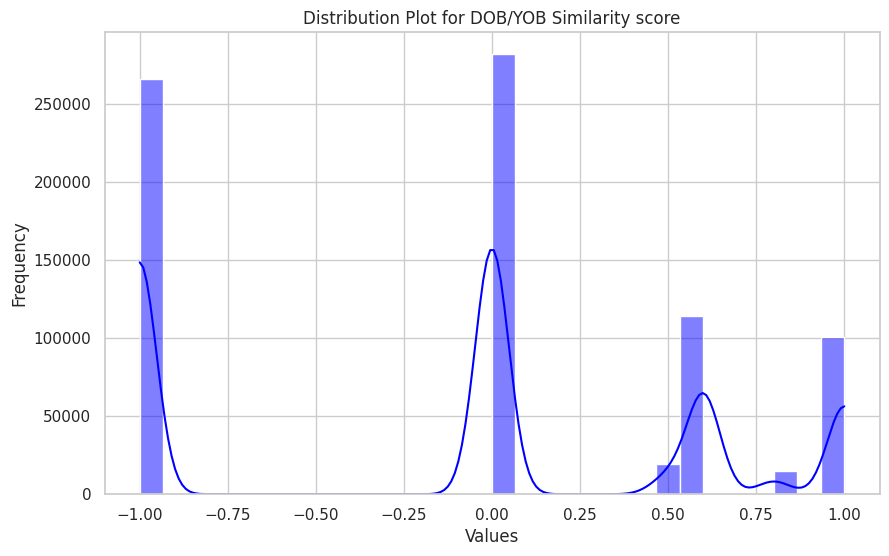

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a distribution plot
sns.histplot(df1['FINAL_DOB_MATCH'], kde=True, color='blue', bins=30)

plt.title(f'Distribution Plot for DOB/YOB Similarity score')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


In [19]:
df1['FINAL_DOB_MATCH'].value_counts()

 0.0    281702
-1.0    266070
 0.6    113894
 1.0    100853
 0.5     19438
 0.8     14598
Name: FINAL_DOB_MATCH, dtype: int64

In [21]:
df1.describe()

,V_UCIF_ID,FINAL_DOB_MATCH,SIAMESE_MATCH_SCORE,Final_Nysiis_bisim_score,N_MATCH_SCORE,ID_score,V_RESOLUTION
count,7.965550e+05,796555.000000,7.965550e+05,796555.000000,796555.000000,796555.000000,796555.000000
mean,8.452797e+07,-0.094762,3.265690e-01,0.832109,95.450771,-0.350921,0.143686
std,4.959264e+07,0.721777,4.050281e-01,0.187716,4.022570,0.687120,0.350772
min,1.890000e+02,-1.000000,8.523774e-25,0.083333,90.000000,-1.000000,0.000000
25%,4.152066e+07,-1.000000,4.875244e-10,0.708333,92.000000,-1.000000,0.000000
50%,8.384208e+07,0.000000,1.213286e-03,0.900000,94.000000,0.000000,0.000000
75%,1.269415e+08,0.600000,8.800237e-01,1.000000,100.000000,0.000000,0.000000
max,1.780054e+08,1.000000,8.855935e-01,1.000000,100.000000,1.000000,1.000000


In [22]:
df1['V_RESOLUTION'].value_counts()

0    682101
1    114454
Name: V_RESOLUTION, dtype: int64

In [22]:
patt_match=re.compile("Match|Matched",re.IGNORECASE)
patt_mismatch = re.compile("Mismatch|Mismatched", re.IGNORECASE)
patt_dob = re.compile("DOB|YOB|Date of Birth|Year of Birth", re.IGNORECASE)



In [24]:
'''df2 = df1[df1["V_COMMENTS"].str.contains(patt_dob)] #only those entries where dob is present
df3=df1[(df1["V_COMMENTS"].str.contains(patt_match)) & (df1["V_COMMENTS"].str.contains(patt_dob))] #entries where dob is present and match only
df4 = df1[(df1["V_COMMENTS"].str.contains(patt_dob)) & (df1["V_COMMENTS"].str.contains(patt_mismatch))] # entries where dob is present and mismatch only
df5 = df1[(df1["V_COMMENTS"].str.contains(patt_dob)) & (~df1["V_COMMENTS"].str.contains(patt_match))] #entries where dob is present but no match term
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)'''

'df2 = df1[df1["V_COMMENTS"].str.contains(patt_dob)] #only those entries where dob is present\ndf3=df1[(df1["V_COMMENTS"].str.contains(patt_match)) & (df1["V_COMMENTS"].str.contains(patt_dob))] #entries where dob is present and match only\ndf4 = df1[(df1["V_COMMENTS"].str.contains(patt_dob)) & (df1["V_COMMENTS"].str.contains(patt_mismatch))] # entries where dob is present and mismatch only\ndf5 = df1[(df1["V_COMMENTS"].str.contains(patt_dob)) & (~df1["V_COMMENTS"].str.contains(patt_match))] #entries where dob is present but no match term\nprint(df2.shape)\nprint(df3.shape)\nprint(df4.shape)\nprint(df5.shape)'

In [26]:
# Initialize columns with -1
df1['dob'] = -1

# Function to update columns based on conditions
def update_columns(row):
    #words = row['Comments'].split()
    words = re.findall(r'\b\w+\b', row['V_COMMENTS'].lower())
    #print(words)
    
    if ('match' in words or 'matched' in words) and ('dob' in words or 'yob' in words or ('date' in words and 'birth' in words) or ('year' in words and 'birth' in words)):
        row['dob'] = 1
    
        
    return row
                                                             
# Apply the function to update columns
df1 = df1.apply(update_columns, axis=1)

In [27]:
# Function to update columns based on conditions
def update_columns(row):
    #words = row['Comments'].split()
    words = re.findall(r'\b\w+\b', row['V_COMMENTS'].lower())
    
    if ('mismatch' in words or 'mismatched' in words) and ('dob' in words or 'yob' in words or ('date' in words and 'birth' in words) or ('year' in words and 'birth' in words)):
        row['dob'] = 0
    return row

df1 = df1.apply(update_columns, axis=1)

In [28]:
df1['dob'].value_counts()

-1    571038
 0    187826
 1     37691
Name: dob, dtype: int64

In [29]:
df1['V_COMMENTS'][df1['dob'] == 1].iloc[60:80]

4216    Match Date of Birth, Match ID number-NRIC, Mat...
4279    Match Full Legal Name, Match Date of Birth (DO...
4308            Match Date of Birth (DOB) and ID Number\n
4323    Match Name, Gender, ID number_NRIC, Date of Bi...
4347    Match Name, Gender, ID number_NRIC, Date of Bi...
4432    Match Name, Gender, DOB, Nationality & Profile...
4436    Match Name, Gender, ID number_NRIC and Date of...
4499    Match Name, Gender, ID number_Passport Number,...
4524                             Matched Name, ID and DOB
4591    Match Name, Date of Birth (DOB) and Profile.\n...
4650    Match Date of Birth, Match ID number-NRIC, Mat...
4703    Match Date of Birth, Match ID number-NRIC, Mat...
4707    Match Date of Birth, Match ID number-NRIC, Mat...
4807       Match Name, Gender, DOB, Nationality & Profile
4857    Match Name, Gender, ID number_NRIC and Date of...
4863    Match Name, Gender, ID number_NRIC and Date of...
4864    Match Date of Birth, Match ID number-NRIC, Mat...
4905    Match 

In [30]:
df1['V_COMMENTS'][df1['dob'] == 0].iloc[20:40]

84     Mismatch Year of Birth (YOB). Customer's YOB i...
86     Mismatch Year Of Birth(YOB).According to World...
87     Mismatch Year Of Birth(YOB).According to World...
88     Mismatch Year Of Birth(YOB).According to World...
89     Mismatch Year of Birth (YOB)\n1961(Inferred)\n...
90     Mismatch Year Of Birth(YOB).According to World...
92     Mismatch Year Of Birth(YOB).According to World...
94     Mismatch Date of Birth (DOB)\nWatchperson DOB ...
103    Mismatch Year Of Birth(YOB).According to World...
106    Mismatch Year of Birth (YOB) . Customer YOB is...
107    Mismatch Year of Birth (YOB). Customer's YOB i...
109    Mismatch Year Of Birth(YOB).According to World...
116                                         Mismatch YOB
125    Mismatch Year Of Birth(YOB).According to World...
127    Mismatch Year of Birth (YOB). Watchlist YOB is...
128    Mismatch Date of Birth (DOB). Watchperson DOB ...
133    Mismatch Year Of Birth(YOB).According to World...
134    Mismatch YOB/Age - Accor

In [31]:
df1.head()

,V_UCIF_ID,FINAL_DOB_MATCH,SIAMESE_MATCH_SCORE,Final_Nysiis_bisim_score,N_MATCH_SCORE,ID_score,V_RESOLUTION,V_COMMENTS,dob
0,59573845,0.0,8.834493e-01,1.0,100.0,-1.0,0,Mismatch Year of Birth (YOB). Customer's YOB i...,0
1,152561464,-1.0,8.828112e-01,1.0,100.0,-1.0,0,"Mismatch Profile\nAccording to World Check, Wa...",-1
2,167249007,0.8,7.588658e-12,0.6,90.0,-1.0,0,Mismatch Full Legal Name_Name Does Not Sound S...,-1
3,160415328,0.5,8.845971e-01,1.0,100.0,-1.0,0,Year of birth mismatch.,0
4,168492554,0.5,1.023299e-07,0.5,100.0,-1.0,1,True Hit Non-Material. Watchperson in Jan 2010...,-1


### distribution of dob scores based on comments saying match dob


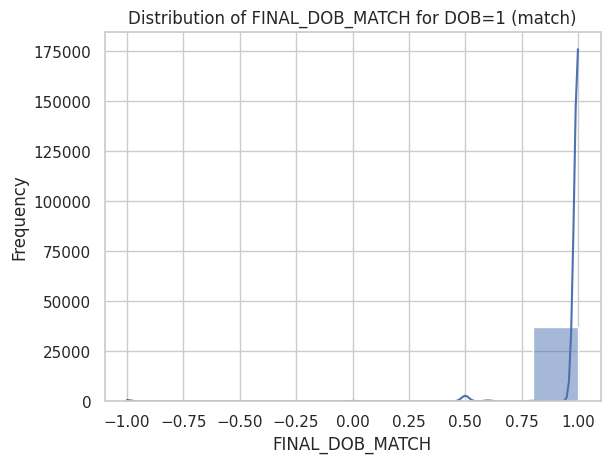

In [33]:
# Filter rows where 'dob' is equal to 1
filtered_dob_match = df1[df1['dob'] == 1]

# Plot distribution of 'FINAL_DOB_MATCH' for 'DOB' equal to 1
sns.histplot(filtered_dob_match['FINAL_DOB_MATCH'], bins=10, kde=True)
plt.title('Distribution of FINAL_DOB_MATCH for DOB=1 (match)')
plt.xlabel('FINAL_DOB_MATCH')
plt.ylabel('Frequency')
plt.show()

In [23]:
####  distribution of dob scores based on comments saying mis-match dob

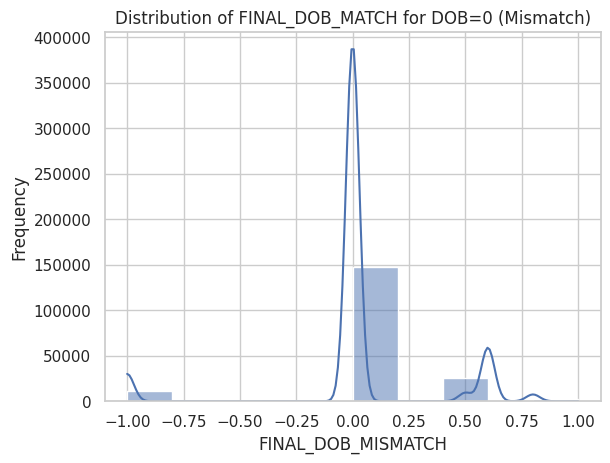

In [34]:
# Filter rows where 'dob' is equal to 0
filtered_dob_mismatch = df1[df1['dob'] == 0]

# Plot distribution of 'FINAL_DOB_MATCH' for 'DOB' equal to 0
sns.histplot(filtered_dob_mismatch['FINAL_DOB_MATCH'], bins=10, kde=True)
plt.title('Distribution of FINAL_DOB_MATCH for DOB=0 (Mismatch)')
plt.xlabel('FINAL_DOB_MISMATCH')
plt.ylabel('Frequency')
plt.show()

In [35]:
filtered_dob_mismatch['FINAL_DOB_MATCH'].value_counts()

 0.0    147873
 0.6     22196
-1.0     11334
 0.5      3514
 0.8      2820
 1.0        89
Name: FINAL_DOB_MATCH, dtype: int64

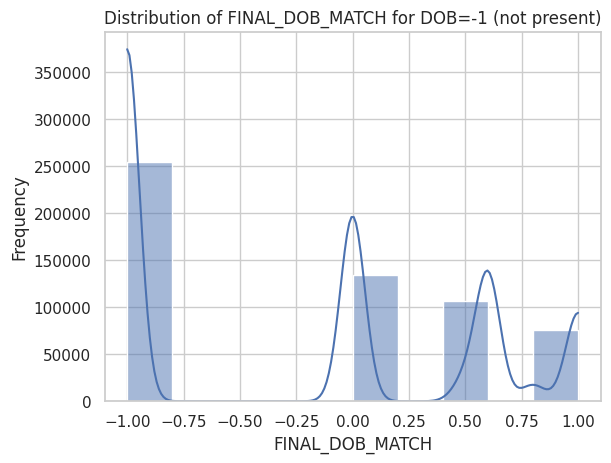

In [37]:
# Filter rows where 'dob' is equal to -1
filtered_dob_null = df1[df1['dob'] == -1]

# Plot distribution of 'FINAL_DOB_MATCH' for 'DOB' equal to -1 (i.e. anchor not present in comment)
sns.histplot(filtered_dob_null['FINAL_DOB_MATCH'], bins=10, kde=True)
plt.title('Distribution of FINAL_DOB_MATCH for DOB=-1 (not present)')
plt.xlabel('FINAL_DOB_MATCH')
plt.ylabel('Frequency')
plt.show()

In [38]:
filtered_dob_null['FINAL_DOB_MATCH'].value_counts()

-1.0    254604
 0.0    133795
 0.6     91613
 1.0     63950
 0.5     15348
 0.8     11728
Name: FINAL_DOB_MATCH, dtype: int64

### Finding threshold for DOB Anchor

In [39]:
df_dob = df1[['FINAL_DOB_MATCH', 'dob', 'V_COMMENTS']]

In [40]:
df_dob = df_dob[df_dob['dob'] != -1]

In [41]:
df_dob.shape

(225517, 3)

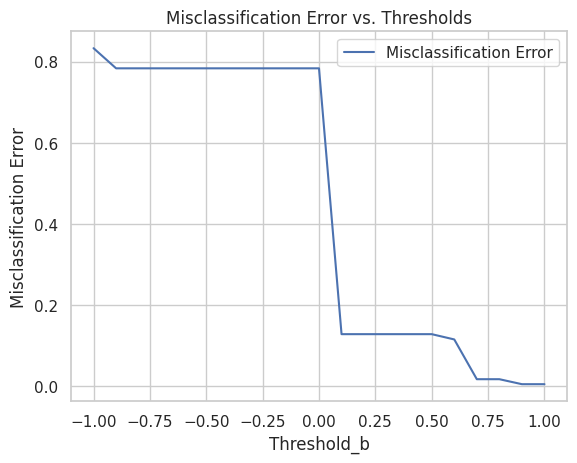

Optimal Thresholds: b=0.8999999999999995, Misclassification Error=0.00428349082330822


In [42]:
# Function to calculate misclassification error
def calculate_misclassification_error(predictions, labels):
    return np.sum(predictions != labels) / len(labels)

# Function to find optimal thresholds
def find_optimal_thresholds(df, threshold_range):
    best_error = float('inf')
    best_thresholds = None

    misclassification_errors = []

    #for a in threshold_range:
    for b in threshold_range:
        predictions = np.zeros(len(df))
        predictions[df['FINAL_DOB_MATCH'] >= b] = 1
        predictions[df['FINAL_DOB_MATCH'] < b] = 0

        error = calculate_misclassification_error(predictions, df['dob'])

        misclassification_errors.append((b, error))

        if error < best_error:
            best_error = error
            best_thresholds = b

    return best_thresholds, misclassification_errors, best_error

# Define threshold range
threshold_range = np.arange(-1, 1.1, 0.1)

# Find optimal thresholds
optimal_thresholds, errors, error1 = find_optimal_thresholds(df_dob, threshold_range)

# Plot misclassification error graph
errors_df = pd.DataFrame(errors, columns=['Threshold_b', 'Misclassification_Error'])
plt.plot(errors_df['Threshold_b'], errors_df['Misclassification_Error'], label='Misclassification Error')
plt.xlabel('Threshold_b')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. Thresholds')
plt.legend()
plt.show()

print(f"Optimal Thresholds: b={optimal_thresholds}, Misclassification Error={error1}")

### navigation to our DOB columns 

In [68]:
# folder_path=dataiku.Folder("Name Screening notebooks").get_path()
# Unseen_proc_data_path=os.path.join(folder_path,"Unseen_processed_data_enhanced_nov_100_edit_0124.csv")
# df_test_nov=pd.read_csv(Unseen_proc_data_path)

In [69]:

# df_test_2=df_test_nov[(df_test_nov["FINAL_DOB_MATCH"]!=-1 ) | (df_test_nov["ID_score"]!=-1)]
# df_test_2.shape

(39969, 147)

In [30]:
import ast

In [71]:
df.columns[df.columns.str.contains("FINAL_DOB_MATCH")]

Index(['FINAL_DOB_MATCH'], dtype='object')

In [72]:
df["V_PREDICTION"]=df["V_PREDICTION"].apply(lambda x: "True Hit" if x==1 else "False Hit" )

In [61]:
# df_test['FINAL_DOB_MATCH']=df_test["FINAL_DOB_MATCH"].apply(lambda x: ast.literal_eval(x))

In [73]:
l=df.copy()

In [74]:
l["V_IC_DOB"]=l['FINAL_WATCHLIST_DOB'].apply(lambda x: x[2])

In [75]:
import ast
l["V_CUST_DOB"]=l["V_CUST_DOB"].apply(lambda x: ast.literal_eval(x))
l["V_WATCHLIST_DOB_2"]=l["V_WATCHLIST_DOB_2"].apply(lambda x: ast.literal_eval(x))

l["V_DOB"]=l["V_DOB"].apply(lambda x: ast.literal_eval(x))

# l["V_IC_DOB"]=l["V_IC_DOB"].apply(lambda x: ast.literal_eval(x))

l["V_DOB_2"]=l["V_DOB_2"].apply(lambda x: ast.literal_eval(x))

In [76]:
l["List_OF_SCORES"]=l[["DOB_MATCH_1","DOB_MATCH_2","DOB_MATCH_3","DOB_MATCH_4"]].apply(lambda x:[x[0],x[1],x[2],x[3]],axis=1)
l["List_OF_SCORES_&_index"]=l["List_OF_SCORES"].apply(lambda x: (x,x.index(max(x))))

map_dic={0:"DOB_MATCH_1",1:"DOB_MATCH_2",2:"DOB_MATCH_3",3:"DOB_MATCH_4"}
map_dic_2={"DOB_MATCH_1":["V_CUST_DOB","V_WATCHLIST_DOB_2"],"DOB_MATCH_2":["V_CUST_DOB","V_DOB"],"DOB_MATCH_3":["V_CUST_DOB","V_IC_DOB"],"DOB_MATCH_4":["V_CUST_DOB","V_DOB_2"]}
l["dob_cols"]= l["List_OF_SCORES_&_index"].apply(lambda x : map_dic_2[map_dic[x[1]]])


In [80]:
l_samp=l.sample(100)

In [81]:
l_samp["dob_vals"]=""
for i in l_samp.index:
    l_samp["dob_vals"][i]=l_samp.loc[i,["dob_cols"]].apply(lambda x: l_samp.loc[i,x]).values[0]
#     print(l.loc[i,["dob_cols"]].apply(lambda x: l.loc[i,x]))
# l[["V_CUST_DOB", "V_DOB"]]

In [82]:
l_samp[["dob_vals","List_OF_SCORES_&_index"]]

,dob_vals,List_OF_SCORES_&_index
732232,"[[[1986, 05, 31]], [[1986, 05, 31]]]","([-1.0, 1.0, -1.0, -1.0], 1)"
16445,"[[[1958, 05, 25], [1958, 05, 25]], [[1957, 06,...","([-1.0, 0.0, 0.0, -1.0], 1)"
774280,"[[[1961, 02, 16], [1961, 02, 16]], [[1961, 02,...","([-1.0, 0.8, 0.8, -1.0], 1)"
741814,"[[[1983, 04, 23], [1983, 04, 23]], [[1983, 05,...","([-1.0, 0.6, 0.6, -1.0], 1)"
146705,"[[[1956, 03, 16], [1956, 03, 16]], [[1971, 197...","([0.0, -1.0, -1.0, -1.0], 0)"
131360,"[[[1988, 02, 15], [1988, 02, 15]], [[]]]","([-1.0, -1.0, -1.0, -1.0], 0)"
532472,"[[[1979, 01, 17], [1979, 01, 17]], [[]]]","([-1.0, -1.0, -1.0, -1.0], 0)"
455933,"[[[1935, 01, 20], [1935, 01, 20]], [[]]]","([-1.0, -1.0, -1.0, -1.0], 0)"
328071,"[[[1996, 07, 13], [1996, 07, 13]], [[1996, 02,...","([-1.0, 0.6, 0.6, -1.0], 1)"
801422,"[[[1995, 07, 09], [1995, 07, 09]], [[1995, 07,...","([-1.0, 1.0, 1.0, -1.0], 1)"


In [83]:
l_samp['dob_index_1']=l_samp["dob_vals"].apply(lambda x: [[(i,j),[sum([int(l==k) for l,k in zip(x[0][i],x[1][j])]) if len(x[1][j])!=5  else sum([1 if val in x[0][i] else 0 for val in x[1][j]])][0]] for j in range(len(x[1])) for i in range(len(x[0]))])
l_samp["dob_index_2"]=l_samp[["dob_index_1","dob_vals"]].apply(lambda x:[j[0] for j in x[0]][[i[-1] for i in x[0]].index(max([int(i[-1]) for i in x[0]]))],axis=1)

In [84]:
l_samp["navi_dob_vals"]=l_samp[["dob_vals","dob_index_2"]].apply(lambda x: [x[0][0][x[1][0]],x[0][1][x[1][1]]],axis=1)

In [85]:
l_samp["navi_dob_vals"]

732232                    [[1986, 05, 31], [1986, 05, 31]]
16445                     [[1958, 05, 25], [1957, 06, 18]]
774280                    [[1961, 02, 16], [1961, 02, 09]]
741814                    [[1983, 04, 23], [1983, 05, 08]]
146705    [[1956, 03, 16], [1971, 1972, 1973, 1974, 1975]]
131360                                [[1988, 02, 15], []]
532472                                [[1979, 01, 17], []]
455933                                [[1935, 01, 20], []]
328071                    [[1996, 07, 13], [1996, 02, 25]]
801422                    [[1995, 07, 09], [1995, 07, 09]]
365242    [[1967, 03, 30], [1953, 1954, 1955, 1956, 1957]]
460775    [[1974, 12, 26], [1965, 1966, 1967, 1968, 1969]]
799601                    [[1997, 06, 23], [1997, 06, 23]]
349916    [[1967, 01, 27], [1960, 1961, 1962, 1963, 1964]]
334540    [[1965, 04, 27], [1955, 1956, 1957, 1958, 1959]]
194344                    [[1989, 09, 02], [1989, 02, 25]]
427053                    [[1977, 11, 28], [1978, 06, 05

In [86]:
l_samp[["navi_dob_vals","dob_vals","dob_index_2","List_OF_SCORES_&_index","V_PREDICTION"]]

,navi_dob_vals,dob_vals,dob_index_2,List_OF_SCORES_&_index,V_PREDICTION
732232,"[[1986, 05, 31], [1986, 05, 31]]","[[[1986, 05, 31]], [[1986, 05, 31]]]","(0, 0)","([-1.0, 1.0, -1.0, -1.0], 1)",True Hit
16445,"[[1958, 05, 25], [1957, 06, 18]]","[[[1958, 05, 25], [1958, 05, 25]], [[1957, 06,...","(0, 0)","([-1.0, 0.0, 0.0, -1.0], 1)",False Hit
774280,"[[1961, 02, 16], [1961, 02, 09]]","[[[1961, 02, 16], [1961, 02, 16]], [[1961, 02,...","(0, 0)","([-1.0, 0.8, 0.8, -1.0], 1)",False Hit
741814,"[[1983, 04, 23], [1983, 05, 08]]","[[[1983, 04, 23], [1983, 04, 23]], [[1983, 05,...","(0, 0)","([-1.0, 0.6, 0.6, -1.0], 1)",False Hit
146705,"[[1956, 03, 16], [1971, 1972, 1973, 1974, 1975]]","[[[1956, 03, 16], [1956, 03, 16]], [[1971, 197...","(0, 0)","([0.0, -1.0, -1.0, -1.0], 0)",False Hit
131360,"[[1988, 02, 15], []]","[[[1988, 02, 15], [1988, 02, 15]], [[]]]","(0, 0)","([-1.0, -1.0, -1.0, -1.0], 0)",False Hit
532472,"[[1979, 01, 17], []]","[[[1979, 01, 17], [1979, 01, 17]], [[]]]","(0, 0)","([-1.0, -1.0, -1.0, -1.0], 0)",False Hit
455933,"[[1935, 01, 20], []]","[[[1935, 01, 20], [1935, 01, 20]], [[]]]","(0, 0)","([-1.0, -1.0, -1.0, -1.0], 0)",False Hit
328071,"[[1996, 07, 13], [1996, 02, 25]]","[[[1996, 07, 13], [1996, 07, 13]], [[1996, 02,...","(0, 0)","([-1.0, 0.6, 0.6, -1.0], 1)",False Hit
801422,"[[1995, 07, 09], [1995, 07, 09]]","[[[1995, 07, 09], [1995, 07, 09]], [[1995, 07,...","(0, 0)","([-1.0, 1.0, 1.0, -1.0], 1)",True Hit


In [87]:
l_samp["cust_data_point"]=l_samp["navi_dob_vals"].apply(lambda x: "/".join(x[0]))
l_samp["wl_data_point"]=l_samp["navi_dob_vals"].apply(lambda x: "/".join(x[1]) if len(x[1])!=5 else x[1])

In [88]:
l_samp.shape

(100, 161)

In [94]:
l_samp["Customer_Source"]="MDM data"
l_samp["Watchlist_Source"]="Refinitiv"
l_samp[["FINAL_DOB_MATCH","cust_data_point","wl_data_point","Customer_Source","Watchlist_Source"]]

,FINAL_DOB_MATCH,cust_data_point,wl_data_point,Customer_Source,Watchlist_Source
732232,1.0,1986/05/31,1986/05/31,MDM data,Refinitiv
16445,0.0,1958/05/25,1957/06/18,MDM data,Refinitiv
774280,0.8,1961/02/16,1961/02/09,MDM data,Refinitiv
741814,0.6,1983/04/23,1983/05/08,MDM data,Refinitiv
146705,0.0,1956/03/16,"[1971, 1972, 1973, 1974, 1975]",MDM data,Refinitiv
131360,-1.0,1988/02/15,,MDM data,Refinitiv
532472,-1.0,1979/01/17,,MDM data,Refinitiv
455933,-1.0,1935/01/20,,MDM data,Refinitiv
328071,0.6,1996/07/13,1996/02/25,MDM data,Refinitiv
801422,1.0,1995/07/09,1995/07/09,MDM data,Refinitiv


In [132]:
l_samp["DOB Structured comment"]=l_samp[["FINAL_DOB_MATCH","cust_data_point","wl_data_point"]].apply(lambda x: "NA" if x[0] == -1 else "Match DOB" if x[0] ==1  \
                                                                                                 else "Match Year of Birth (YOB)/Age" if x[0]==0.5 and type( x[2] ==list ) else "Match Year of Birth (YOB)" if x[0]==0.6 and type( x[2] !=list )  else "Mismatch Date of Birth (DOB)" if (x[0]==0 and type(x[2])!=list) else "Mismatch Year of Birth (YOB)/Age" if (x[0]==0 and type(x[2])==list) else "Match DOB" if x[0]>=0.89  \
                                                                                                 else "Match Year and Month" if  0.89>x[0]>0.6 else "Mismatch YOB" ,axis=1)

l_samp[["DOB Structured comment","FINAL_DOB_MATCH","cust_data_point","wl_data_point","Customer_Source","Watchlist_Source"]]

,DOB Structured comment,FINAL_DOB_MATCH,cust_data_point,wl_data_point,Customer_Source,Watchlist_Source
732232,Match DOB,1.0,1986/05/31,1986/05/31,MDM data,Refinitiv
16445,Mismatch Date of Birth (DOB),0.0,1958/05/25,1957/06/18,MDM data,Refinitiv
774280,Match Year and Month,0.8,1961/02/16,1961/02/09,MDM data,Refinitiv
741814,Match Year of Birth (YOB),0.6,1983/04/23,1983/05/08,MDM data,Refinitiv
146705,Mismatch Year of Birth (YOB)/Age,0.0,1956/03/16,"[1971, 1972, 1973, 1974, 1975]",MDM data,Refinitiv
131360,NA,-1.0,1988/02/15,,MDM data,Refinitiv
532472,NA,-1.0,1979/01/17,,MDM data,Refinitiv
455933,NA,-1.0,1935/01/20,,MDM data,Refinitiv
328071,Match Year of Birth (YOB),0.6,1996/07/13,1996/02/25,MDM data,Refinitiv
801422,Match DOB,1.0,1995/07/09,1995/07/09,MDM data,Refinitiv


In [133]:
print(l_samp["DOB Structured comment"].value_counts())
l_samp[l_samp["DOB Structured comment"]=="Match Year and Month"][["FINAL_DOB_MATCH","cust_data_point","wl_data_point","Customer_Source","Watchlist_Source"]]

NA                                  27
Match DOB                           19
Mismatch Date of Birth (DOB)        19
Mismatch Year of Birth (YOB)/Age    17
Match Year of Birth (YOB)           12
Match Year and Month                 3
Match Year of Birth (YOB)/Age        3
Name: DOB Structured comment, dtype: int64


,FINAL_DOB_MATCH,cust_data_point,wl_data_point,Customer_Source,Watchlist_Source
774280,0.8,1961/02/16,1961/02/09,MDM data,Refinitiv
773045,0.8,2000/08/06,2000/08/07,MDM data,Refinitiv
591018,0.8,1985/11/30,1985/11/24,MDM data,Refinitiv


In [134]:
l_samp[l_samp["FINAL_DOB_MATCH"]==0.6][["DOB Structured comment","cust_data_point","wl_data_point"]]

,DOB Structured comment,cust_data_point,wl_data_point
741814,Match Year of Birth (YOB),1983/04/23,1983/05/08
328071,Match Year of Birth (YOB),1996/07/13,1996/02/25
194344,Match Year of Birth (YOB),1989/09/02,1989/02/25
208784,Match Year of Birth (YOB),1982/03/15,1982/07/01
289241,Match Year of Birth (YOB),1997/11/17,1997/09/09
150127,Match Year of Birth (YOB),1983/01/21,1983/08/04
621928,Match Year of Birth (YOB),1987/01/16,1987/11/23
732996,Match Year of Birth (YOB),1990/02/25,1990/07/05
643430,Match Year of Birth (YOB),1962/12/02,1962/11/20
309702,Match Year of Birth (YOB),1980/06/05,1980/02/29


In [139]:
l_samp[["FINAL_DOB_MATCH","cust_data_point","wl_data_point","Customer_Source","Watchlist_Source","DOB Structured comment"]]

,FINAL_DOB_MATCH,cust_data_point,wl_data_point,Customer_Source,Watchlist_Source,DOB Structured comment
732232,1.0,1986/05/31,1986/05/31,MDM data,Refinitiv,Match DOB
16445,0.0,1958/05/25,1957/06/18,MDM data,Refinitiv,Mismatch Date of Birth (DOB)
774280,0.8,1961/02/16,1961/02/09,MDM data,Refinitiv,Match Year and Month
741814,0.6,1983/04/23,1983/05/08,MDM data,Refinitiv,Match Year of Birth (YOB)
146705,0.0,1956/03/16,"[1971, 1972, 1973, 1974, 1975]",MDM data,Refinitiv,Mismatch Year of Birth (YOB)/Age
131360,-1.0,1988/02/15,,MDM data,Refinitiv,NA
532472,-1.0,1979/01/17,,MDM data,Refinitiv,NA
455933,-1.0,1935/01/20,,MDM data,Refinitiv,NA
328071,0.6,1996/07/13,1996/02/25,MDM data,Refinitiv,Match Year of Birth (YOB)
801422,1.0,1995/07/09,1995/07/09,MDM data,Refinitiv,Match DOB


In [136]:
l_samp[l_samp["DOB Structured comment"]=="Mismatch YOB"][["FINAL_DOB_MATCH","cust_data_point","wl_data_point","Customer_Source","Watchlist_Source"]]

,FINAL_DOB_MATCH,cust_data_point,wl_data_point,Customer_Source,Watchlist_Source


In [137]:
# optimal threshold for DOB is 0.899 by checking for minimum misclassification error for only match/mismatch (0/1)

In [0]:
# Structured to be explained Mismatch Age/YOB, Mismatch DOB
1) Data absent on any one side - NA comment


TH
Match DOB                   x==1  all available & match  #
Match Year of Birth (YOB)   X==0.6 all available & match
Match Year of Birth (YOB)/Age x==0.5 if age and age as of date present & mismatch #


FH
Data present
2)No threshold used
FH
Mismatch Date of Birth (DOB)   x==0 all available but mismatch  
Mismatch Year of Birth (YOB)/Age   x==0 if age and age as of date present but mismatch 




3)Threshold be used and data present
 if x>=0.899 - Match DOB
    else if 0.89>x>0.6 Match Year and Month
    else if x<0.6 Mismatch YOB


In [0]:
### Structured Comments for ID 
Mismatch ID number NRIC
Mismatch ID number Citizenship Number
Mismatch ID number 
Mismatch ID number_Passport Number
Match ID number _Citizenship Number
Match ID number_NRIC

In [131]:
df["ID_score"].value_counts()
# df[]

-1.000000    377425
 0.000000    329034
 1.000000     97829
 0.916667      3133
 0.750000      1476
 0.833333       670
 0.888889       385
 0.875000       127
 0.950000       118
 0.300000        72
 0.900000        47
 0.285714        23
 0.850000        22
 0.350000        14
 0.625000        12
 0.857143        10
 0.777778         9
 0.400000         9
 0.342857         4
 0.714286         4
 0.500000         3
 0.800000         3
 0.666667         3
 0.818182         3
 0.666667         3
 0.857143         3
 0.909091         2
 0.375000         1
 0.529412         1
Name: ID_score, dtype: int64

In [162]:
df.columns[df.columns.str.contains("id")]

Index(['al_wl_ids', 'cust_id_all_sp_accom', 'trans_agg_v_id_type'], dtype='object')

In [163]:
df['cust_id_all_sp_accom']

0                      ['EE0199288']
1                       ['C0816917']
2         ['PF4574209', 'EJ5051529']
3                      ['BQ0001445']
4         ['PE1844290', 'PF5000726']
                     ...            
810440              ['820123145079']
810441              ['840708125055']
810442              ['831126015070']
810443              ['921017146011']
810444    ['P1246450B', 'PF5368170']
Name: cust_id_all_sp_accom, Length: 810445, dtype: object

In [128]:
df["trans_agg_v_id_type"]
# Structured to be explained Mismatch Age/YOB, Mismatch DOB
1) Data absent on any one side - NA comment

2)TH  x==1
Match ID number _Citizenship Number
Match ID number_NRIC
Match ID Passport Number

3)FH -   x==0 
Mismatch ID number NRIC
Mismatch ID number Citizenship Number
Mismatch ID number 


4)Threshold be used and data present
 if x>=0.39 - 
    Match ID number _Citizenship Number
    Match ID number_NRIC
    Match ID Passport Number

    
else x<0.39
    Mismatch ID number NRIC
    Mismatch ID number Citizenship Number
    Mismatch ID number 

0                 ['PASS']
1                 ['PASS']
2         ['WVSA', 'PASS']
3                 ['PASS']
4         ['PASS', 'WVSA']
                ...       
810440            ['NWIC']
810441            ['NWIC']
810442            ['NWIC']
810443            ['NWIC']
810444    ['PASS', 'WVSA']
Name: trans_agg_v_id_type, Length: 810445, dtype: object

In [151]:
df["trans_agg_v_id_type"]=df["trans_agg_v_id_type"].apply(lambda x: "[]" if pd.isna(x) else x)
# 

In [156]:
df["trans_agg_v_id_type"]=df["trans_agg_v_id_type"].apply(lambda x: ast.literal_eval(x))


In [169]:
df[df["trans_agg_v_id_type"].apply(lambda x: len(set(x))==1)]["trans_agg_v_id_type"].astype(str).value_counts()

['NWIC']                                                            333131
['PASS']                                                            174752
['OLIC']                                                             12033
['PASS', 'PASS']                                                      3854
['PRIC']                                                              2203
['PLIC']                                                              1120
['BRCT']                                                               983
['AMIC']                                                               482
['PASS', 'PASS', 'PASS']                                                46
['BRNO']                                                                16
['NWIC', 'NWIC']                                                         7
['PASS', 'PASS', 'PASS', 'PASS', 'PASS', 'PASS', 'PASS', 'PASS']         2
['PRIC', 'PRIC']                                                         1
['PASS', 'PASS', 'PASS', 

In [0]:
df[ "Id Structured comment"]=df[["ID_score","",""]]

### Analyzing ID_score score

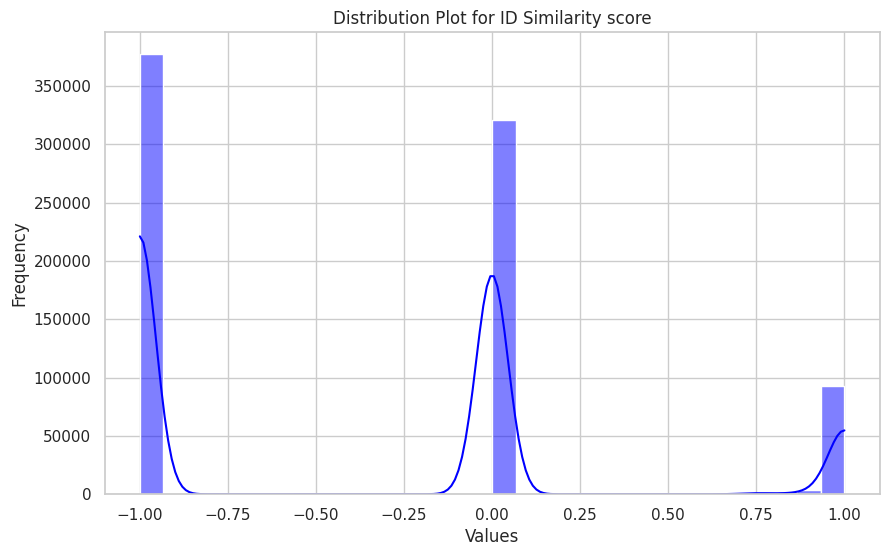

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a distribution plot
sns.histplot(df1['ID_score'], kde=True, color='blue', bins=30)

plt.title(f'Distribution Plot for ID Similarity score')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [45]:
patt_match=re.compile("Match|Matched",re.IGNORECASE)
patt_mismatch = re.compile("Mismatch|Mismatched", re.IGNORECASE)
patt_id_match = re.compile("Match NRIC|Match ID Number|Match Identification No|Match Identification Number", re.IGNORECASE)

In [46]:
df8 = df1[df1["V_COMMENTS"].str.contains(patt_id_match)]

In [47]:
df8.shape

(267128, 9)

In [48]:
df1['id_new'] = np.where(df1['V_COMMENTS'].str.contains(patt_id_match), 1, -1)

In [49]:
df1['id_new'] = np.where((df1['V_COMMENTS'].str.contains(patt_id_match) & df1['V_COMMENTS'].str.contains(patt_mismatch)), 0, df1['id_new'])

In [50]:
df1['id_new'].value_counts()

-1    529427
 0    237133
 1     29995
Name: id_new, dtype: int64

In [56]:
df1['V_COMMENTS'][df1['id_new'] == 1].iloc[60:80]

4200    Match Date of Birth, Match ID number-NRIC, Mat...
4216    Match Date of Birth, Match ID number-NRIC, Mat...
4219                                 Match ID number_NRIC
4279    Match Full Legal Name, Match Date of Birth (DO...
4322                               Match ID number_NRIC\n
4355                               Match ID number_NRIC\n
4393                                 Match ID number_NRIC
4399                               Match ID number_NRIC\n
4406                               Match ID number_NRIC\n
4461                               Match ID number_NRIC\n
4476                               Match ID number_NRIC\n
4484                               Match ID number_NRIC\n
4491                               Match ID number_NRIC\n
4635                     Match Identification Number_NRIC
4650    Match Date of Birth, Match ID number-NRIC, Mat...
4677                               Match ID number_NRIC\n
4701                               Match ID number_NRIC\n
4703    Match 

In [53]:
df1.head()

,V_UCIF_ID,FINAL_DOB_MATCH,SIAMESE_MATCH_SCORE,Final_Nysiis_bisim_score,N_MATCH_SCORE,ID_score,V_RESOLUTION,V_COMMENTS,dob,id_new
0,59573845,0.0,8.834493e-01,1.0,100.0,-1.0,0,Mismatch Year of Birth (YOB). Customer's YOB i...,0,-1
1,152561464,-1.0,8.828112e-01,1.0,100.0,-1.0,0,"Mismatch Profile\nAccording to World Check, Wa...",-1,-1
2,167249007,0.8,7.588658e-12,0.6,90.0,-1.0,0,Mismatch Full Legal Name_Name Does Not Sound S...,-1,-1
3,160415328,0.5,8.845971e-01,1.0,100.0,-1.0,0,Year of birth mismatch.,0,-1
4,168492554,0.5,1.023299e-07,0.5,100.0,-1.0,1,True Hit Non-Material. Watchperson in Jan 2010...,-1,-1


In [0]:
'''df2 = df1[df1["V_COMMENTS"].str.contains(patt_id)] #only those entries where id is present
df3=df1[(df1["V_COMMENTS"].str.contains(patt_match)) & (df1["V_COMMENTS"].str.contains(patt_id))] #entries where id is present and match only
df4 = df1[(df1["V_COMMENTS"].str.contains(patt_id)) & (df1["V_COMMENTS"].str.contains(patt_mismatch))] # entries where id is present and mismatch only
df5 = df1[(df1["V_COMMENTS"].str.contains(patt_id)) & (~df1["V_COMMENTS"].str.contains(patt_match))] #entries where id is present but no match term
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)'''

In [0]:
'''# Initialize columns with -1
df1['id'] = -1

# Function to update columns based on conditions
def update_columns(row):
    #words = row['Comments'].split()
    words = re.findall(r'\b\w+\b', row['V_COMMENTS'].lower())
    #print(words)
    
    if ('match' in words or 'matched' in words) and (('id' in words and 'number' in words) or 'nric' in words or ('identification' in words and 'number' in words) or ('identification' in words and 'no' in words)):
        row['id'] = 1

    return row
                                                             
# Apply the function to update columns
df1 = df1.apply(update_columns, axis=1)'''

In [0]:
'''# Function to update columns based on conditions
def update_columns(row):
    #words = row['Comments'].split()
    words = re.findall(r'\b\w+\b', row['V_COMMENTS'].lower())
    #print(words)
    
    if ('mismatch' in words or 'mismatched' in words) and (('id' in words and 'number' in words) or 'nric' in words or ('identification' in words and 'number' in words) or ('identification' in words and 'no' in words)):
        row['id'] = 0
    return row

# Apply the function to update columns
df1 = df1.apply(update_columns, axis=1)'''

In [0]:
#df1['id'].value_counts()

In [0]:
#df1['V_COMMENTS'][df1['id'] == 0].iloc[0]

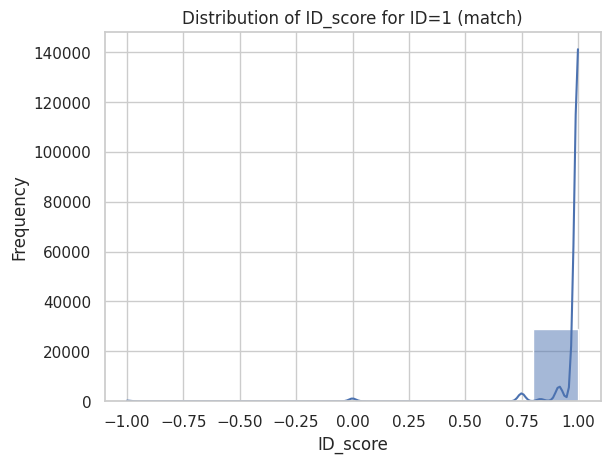

In [57]:
# Filter rows where 'id_new' is equal to 1
filtered_id_match = df1[df1['id_new'] == 1]

# Plot distribution of 'ID_score' for 'id' equal to 1
sns.histplot(filtered_id_match['ID_score'], bins=10, kde=True)
plt.title('Distribution of ID_score for ID=1 (match)')
plt.xlabel('ID_score')
plt.ylabel('Frequency')
plt.show()

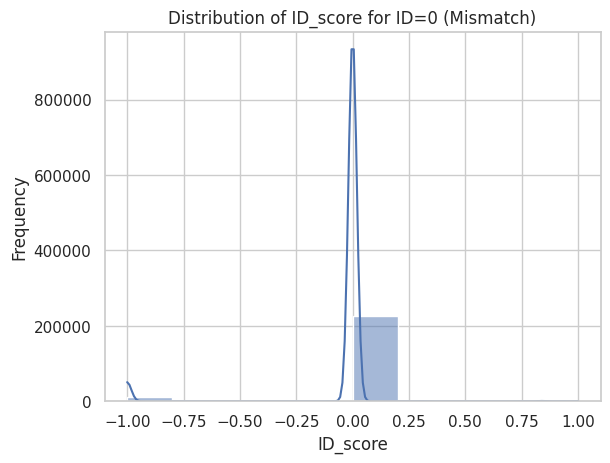

In [58]:
# Filter rows where 'id_new' is equal to 0
filtered_id_mismatch = df1[df1['id_new'] == 0]

# Plot distribution of 'ID_score' for 'id_new' equal to 0
sns.histplot(filtered_id_mismatch['ID_score'], bins=10, kde=True)
plt.title('Distribution of ID_score for ID=0 (Mismatch)')
plt.xlabel('ID_score')
plt.ylabel('Frequency')
plt.show()

In [59]:
filtered_id_mismatch.shape

(237133, 10)

In [60]:
filtered_id_mismatch[['ID_score', 'V_COMMENTS']].iloc[0:10]

,ID_score,V_COMMENTS
27,-1.0,Mismatch ID Number_NRIC\nWatchperson's NRIC = ...
44,0.0,Mismatch ID number_NRIC
46,0.0,Mismatch ID number_NRIC
49,0.0,Mismatch ID number_NRIC
96,0.0,Mismatch ID number_NRIC\n
99,0.0,Mismatch ID number_NRIC
102,0.0,Mismatch ID number_NRIC
119,0.0,Mismatch ID number_NRIC
123,0.0,Mismatch ID number_NRIC
137,0.0,Mismatch ID number_NRIC


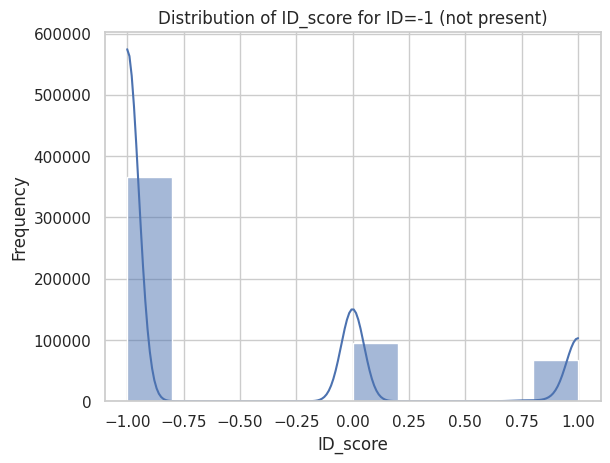

In [61]:
# Filter rows where 'id_new' is equal to -1
filtered_id_null = df1[df1['id_new'] == -1]

# Plot distribution of 'ID_score' for 'id_new' equal to -1 (i.e. anchor not present in comment)
sns.histplot(filtered_id_null['ID_score'], bins=10, kde=True)
plt.title('Distribution of ID_score for ID=-1 (not present)')
plt.xlabel('ID_score')
plt.ylabel('Frequency')
plt.show()

In [62]:
#df1 = df1.drop(['id'],axis=1)

### Finding threshold for ID Anchor

In [64]:
df_id = df1[['ID_score', 'id_new', 'V_COMMENTS']]

In [65]:
df_id = df_id[df_id['id_new'] != -1]

In [66]:
df_id.shape

(267128, 3)

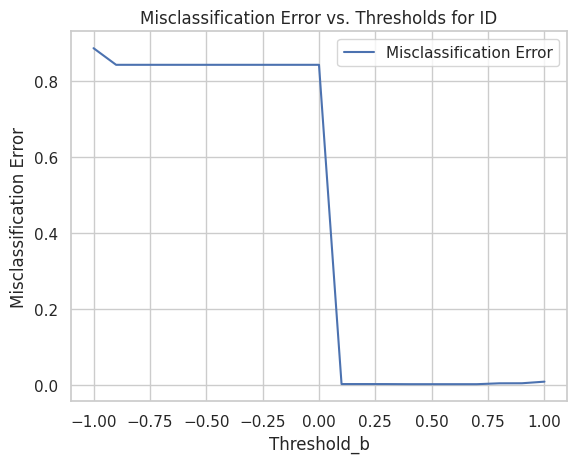

Optimal Thresholds: b=0.3999999999999997, Misclassification Error=0.0023322152675870744


In [67]:
# Function to calculate misclassification error
def calculate_misclassification_error(predictions, labels):
    return np.sum(predictions != labels) / len(labels)

# Function to find optimal thresholds
def find_optimal_thresholds(df, threshold_range):
    best_error = float('inf')
    best_thresholds = None

    misclassification_errors = []

    #for a in threshold_range:
    for b in threshold_range:
        predictions = np.zeros(len(df))
        predictions[df['ID_score'] >= b] = 1
        predictions[df['ID_score'] < b] = 0

        error = calculate_misclassification_error(predictions, df['id_new'])

        misclassification_errors.append((b, error))

        if error < best_error:
            best_error = error
            best_thresholds = b

    return best_thresholds, misclassification_errors, best_error

# Define threshold range
threshold_range = np.arange(-1, 1.1, 0.1)

# Find optimal thresholds
optimal_thresholds, errors, error1 = find_optimal_thresholds(df_id, threshold_range)

# Plot misclassification error graph
errors_df = pd.DataFrame(errors, columns=['Threshold_b', 'Misclassification_Error'])
plt.plot(errors_df['Threshold_b'], errors_df['Misclassification_Error'], label='Misclassification Error')
plt.xlabel('Threshold_b')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. Thresholds for ID')
plt.legend()
plt.show()

print(f"Optimal Thresholds: b={optimal_thresholds}, Misclassification Error={error1}")

### Analyzing SIAMESE_MATCH_SCORE 

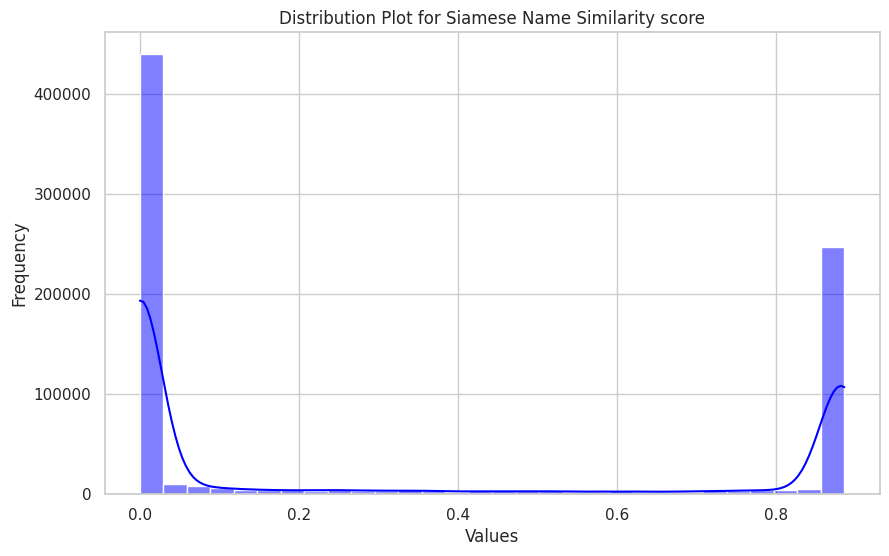

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a distribution plot
sns.histplot(df1['SIAMESE_MATCH_SCORE'], kde=True, color='blue', bins=30)

plt.title(f'Distribution Plot for Siamese Name Similarity score')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [69]:
df1['SIAMESE_MATCH_SCORE'].describe()

count    7.965550e+05
mean     3.265690e-01
std      4.050281e-01
min      8.523774e-25
25%      4.875244e-10
50%      1.213286e-03
75%      8.800237e-01
max      8.855935e-01
Name: SIAMESE_MATCH_SCORE, dtype: float64

In [70]:
patt_match=re.compile("Match|Matched",re.IGNORECASE)
patt_mismatch = re.compile("Mismatch|Mismatched", re.IGNORECASE)
patt_name = re.compile("name", re.IGNORECASE)

In [71]:
df8 = df1[df1["V_COMMENTS"].str.contains(patt_name)]

In [72]:
df8.shape

(232676, 10)

In [73]:
patt_match=re.compile("Match|Matched",re.IGNORECASE)
patt_mismatch = re.compile("Mismatch|Mismatched", re.IGNORECASE)
patt_name_match=re.compile("Match Full Legal Name|Match Name|Match_ Full Legal Name|Match name|Match_name|Matched Name|Matched name\
Match_Name|Match_Full Legal Name|Match_ Name|Match Full Legal  Name |Match ID and Full Legal Name|Match ID or Full Legal Name|Match ID & Legal Name|Match ID and/or Full Legal Name",re.IGNORECASE)

In [74]:
df8 = df1[df1["V_COMMENTS"].str.contains(patt_name_match)]

In [75]:
df8.shape

(204594, 10)

In [76]:
df1['name'] = np.where(df1['V_COMMENTS'].str.contains(patt_name_match), 1, -1)

In [77]:
df1['name'].value_counts()

-1    591961
 1    204594
Name: name, dtype: int64

In [78]:
df1['name'] = np.where((df1['V_COMMENTS'].str.contains(patt_name_match) & df1['V_COMMENTS'].str.contains(patt_mismatch)), 0, df1['name'])

In [79]:
df1['name'].value_counts()

-1    591961
 0    135885
 1     68709
Name: name, dtype: int64

In [82]:
df1['V_COMMENTS'][df1['name'] == 1].iloc[140:160]

5368    True Hit Non-material. Match Full Legal Name, ...
5370    Match Name, Date of Birth (DOB) and Profile.\n...
5371            Match Full Legal  Name &  ID number_NRIC.
5389    True Hit Non-material. Match Full Legal Name, ...
5393         \n\nMatch Full Legal  Name &  ID number_NRIC
5432    Match Full Legal Name, Match Date of Birth (DO...
5480             Match Full Legal  Name &  ID number_NRIC
5522             Match Full Legal  Name &  ID number_NRIC
5545         \n\nMatch Full Legal  Name &  ID number_NRIC
5566    Match Name, Gender, ID number_NRIC and Date of...
5688           \nMatch Full Legal  Name &  ID number_NRIC
5699    Match Name, Gender, ID number_NRIC and Date of...
5731          \nMatch Full Legal  Name &  ID number_NRIC.
5796    Match Full Legal Name, Gender, Nationality and...
5801           \nMatch Full Legal  Name &  ID number_NRIC
5829    Match Name, Gender, ID number_NRIC and Date of...
5868               Match Name, Gender, Nationality & DOB.
5900    Match 

In [83]:
df1.head()

,V_UCIF_ID,FINAL_DOB_MATCH,SIAMESE_MATCH_SCORE,Final_Nysiis_bisim_score,N_MATCH_SCORE,ID_score,V_RESOLUTION,V_COMMENTS,dob,id_new,name
0,59573845,0.0,8.834493e-01,1.0,100.0,-1.0,0,Mismatch Year of Birth (YOB). Customer's YOB i...,0,-1,-1
1,152561464,-1.0,8.828112e-01,1.0,100.0,-1.0,0,"Mismatch Profile\nAccording to World Check, Wa...",-1,-1,-1
2,167249007,0.8,7.588658e-12,0.6,90.0,-1.0,0,Mismatch Full Legal Name_Name Does Not Sound S...,-1,-1,0
3,160415328,0.5,8.845971e-01,1.0,100.0,-1.0,0,Year of birth mismatch.,0,-1,-1
4,168492554,0.5,1.023299e-07,0.5,100.0,-1.0,1,True Hit Non-Material. Watchperson in Jan 2010...,-1,-1,-1


In [0]:
#df1['siam_name'].value_counts()

In [0]:
'''patt_3=re.compile("Mismatch Full Legal Name|Mismatch Name|Mismatch_ Full Legal Name|Mismatch name|Mismatch_name|Mismatched Name|Mismatched name\
Mismatch_Name|Mismatch_Full Legal Name|Mismatch_ Name|Mismatch Full Legal  Name |Mismatch ID and Full Legal Name|Mismatch ID or Full Legal Name|Mismatch ID & Legal Name|Mismatch ID and/or Full Legal Name",re.IGNORECASE)
df_mismatch =df5[(df5["V_COMMENTS"].str.contains(patt_3))]'''

### Finding threshold for NAME Anchor- SIAMESE

In [84]:
df_name = df1.copy()

In [85]:
df_name = df_name[df_name['name'] != -1]

In [86]:
df_name.shape

(204594, 11)

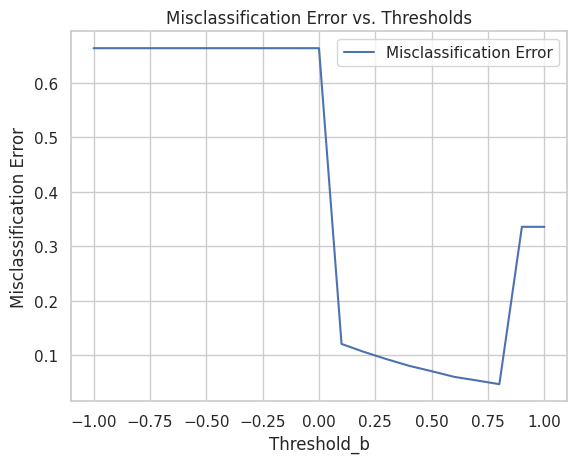

Optimal Thresholds: b=0.7999999999999996, Misclassification Error=0.046570280653391596


In [87]:
# Function to calculate misclassification error
def calculate_misclassification_error(predictions, labels):
    return np.sum(predictions != labels) / len(labels)

# Function to find optimal thresholds
def find_optimal_thresholds(df, threshold_range):
    best_error = float('inf')
    best_thresholds = None

    misclassification_errors = []

    #for a in threshold_range:
    for b in threshold_range:
        predictions = np.zeros(len(df))
        predictions[df['SIAMESE_MATCH_SCORE'] >= b] = 1
        predictions[df['SIAMESE_MATCH_SCORE'] < b] = 0

        error = calculate_misclassification_error(predictions, df['name'])

        misclassification_errors.append((b, error))

        if error < best_error:
            best_error = error
            best_thresholds = b

    return best_thresholds, misclassification_errors, best_error

# Define threshold range
threshold_range = np.arange(-1, 1.1, 0.1)

# Find optimal thresholds
optimal_thresholds, errors, error1 = find_optimal_thresholds(df_name, threshold_range)

# Plot misclassification error graph
errors_df = pd.DataFrame(errors, columns=['Threshold_b', 'Misclassification_Error'])
plt.plot(errors_df['Threshold_b'], errors_df['Misclassification_Error'], label='Misclassification Error')
plt.xlabel('Threshold_b')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. Thresholds')
plt.legend()
plt.show()

print(f"Optimal Thresholds: b={optimal_thresholds}, Misclassification Error={error1}")

### Finding threshold for Final_Nysiis_bisim_score

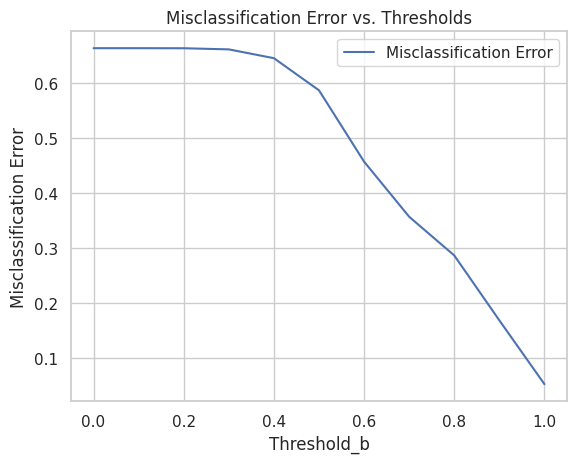

Optimal Thresholds: b=1.0, Misclassification Error=0.053085623234307946


In [88]:
# Function to calculate misclassification error
def calculate_misclassification_error(predictions, labels):
    return np.sum(predictions != labels) / len(labels)

# Function to find optimal thresholds
def find_optimal_thresholds(df, threshold_range):
    best_error = float('inf')
    best_thresholds = None

    misclassification_errors = []

    #for a in threshold_range:
    for b in threshold_range:
        predictions = np.zeros(len(df))
        predictions[df['Final_Nysiis_bisim_score'] >= b] = 1
        predictions[df['Final_Nysiis_bisim_score'] < b] = 0

        error = calculate_misclassification_error(predictions, df['name'])

        misclassification_errors.append((b, error))

        if error < best_error:
            best_error = error
            best_thresholds = b

    return best_thresholds, misclassification_errors, best_error

# Define threshold range
threshold_range = np.arange(0, 1.1, 0.1)

# Find optimal thresholds
optimal_thresholds, errors, error1 = find_optimal_thresholds(df_name, threshold_range)

# Plot misclassification error graph
errors_df = pd.DataFrame(errors, columns=['Threshold_b', 'Misclassification_Error'])
plt.plot(errors_df['Threshold_b'], errors_df['Misclassification_Error'], label='Misclassification Error')
plt.xlabel('Threshold_b')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. Thresholds')
plt.legend()
plt.show()

print(f"Optimal Thresholds: b={optimal_thresholds}, Misclassification Error={error1}")

### Finding threshold for N_MATCH_SCORE

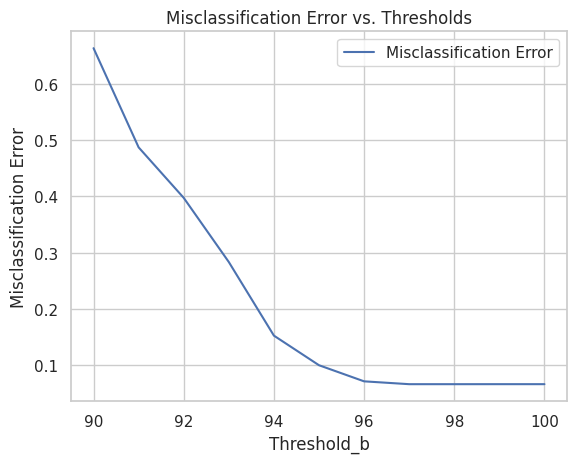

Optimal Thresholds: b=98, Misclassification Error=0.06553955638972794


In [90]:
# Function to calculate misclassification error
def calculate_misclassification_error(predictions, labels):
    return np.sum(predictions != labels) / len(labels)

# Function to find optimal thresholds
def find_optimal_thresholds(df, threshold_range):
    best_error = float('inf')
    best_thresholds = None

    misclassification_errors = []

    #for a in threshold_range:
    for b in threshold_range:
        predictions = np.zeros(len(df))
        predictions[df['N_MATCH_SCORE'] >= b] = 1
        predictions[df['N_MATCH_SCORE'] < b] = 0

        error = calculate_misclassification_error(predictions, df['name'])

        misclassification_errors.append((b, error))

        if error < best_error:
            best_error = error
            best_thresholds = b

    return best_thresholds, misclassification_errors, best_error

# Define threshold range
threshold_range = np.arange(90, 101, 1)

# Find optimal thresholds
optimal_thresholds, errors, error1 = find_optimal_thresholds(df_name, threshold_range)

# Plot misclassification error graph
errors_df = pd.DataFrame(errors, columns=['Threshold_b', 'Misclassification_Error'])
plt.plot(errors_df['Threshold_b'], errors_df['Misclassification_Error'], label='Misclassification Error')
plt.xlabel('Threshold_b')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. Thresholds')
plt.legend()
plt.show()

print(f"Optimal Thresholds: b={optimal_thresholds}, Misclassification Error={error1}")

### Testing the Performance on Test data

In [91]:
df_test.shape

(22385, 39)

In [92]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22385 entries, 0 to 22384
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FINAL_DOB_MATCH           22385 non-null  float64
 1   SIAMESE_MATCH_SCORE       22385 non-null  float64
 2   Final_Nysiis_bisim_score  22385 non-null  float64
 3   N_MATCH_SCORE             22385 non-null  float64
 4   ID_score                  22385 non-null  float64
 5   V_RESOLUTION              22385 non-null  int64  
 6   V_COMMENTS                22385 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ MB


In [93]:
test_df['V_COMMENTS'].isnull().sum()

0

In [94]:
# Initialize columns with -1
test_df['test_id'] = -1
test_df['test_dob'] = -1
test_df['test_name'] = -1

In [95]:
# Initialize columns with -1
test_df['test_dob'] = -1

# Function to update columns based on conditions
def update_columns(row):
    #words = row['Comments'].split()
    words = re.findall(r'\b\w+\b', row['V_COMMENTS'].lower())
    #print(words)
    
    if ('match' in words or 'matched' in words) and ('dob' in words or 'yob' in words or ('date' in words and 'birth' in words) or ('year' in words and 'birth' in words)):
        row['test_dob'] = 1
    
        
    return row

# Apply the function to update columns
test_df = test_df.apply(update_columns, axis=1)

In [96]:
# Function to update columns based on conditions
def update_columns(row):
    #words = row['Comments'].split()
    words = re.findall(r'\b\w+\b', row['V_COMMENTS'].lower())
    
    if ('mismatch' in words or 'mismatched' in words) and ('dob' in words or 'yob' in words or ('date' in words and 'birth' in words) or ('year' in words and 'birth' in words)):
        row['test_dob'] = 0
    return row

test_df = test_df.apply(update_columns, axis=1)

In [97]:
test_df['test_dob'].value_counts()

 0    13597
-1     8624
 1      164
Name: test_dob, dtype: int64

In [102]:
test_df['V_COMMENTS'][test_df['test_dob'] == 1].iloc[140:160]

19627    Match Full Legal Name. Match Gender. Match Dat...
19728         Match full legal Name & Date of Birth (DOB).
19817    Match Name, Gender, DOB, Nationality & ID Numb...
19873    True Hit Non-material. Match Full Legal Name, ...
20061    Match Full Legal Name. Match Gender. Match Dat...
20074    Match Date of Birth, Match ID number-NRIC, Mat...
20112    Match Full Legal Name. Match Gender. Match Dat...
20164    Match date of Birth, Match ID number NRIC, Mat...
20242       Match full Legal Name, Match Date Of Birth DOB
20449    Match Full Legal Name, Date of Birth (DOB) and...
20491    Match Full Legal Name, ID number_NRIC & Date o...
20620    Match Date of Birth, Match ID number-NRIC, Mat...
20877                            Match Date of Birth (DOB)
20896    Match Date of Birth, Match ID number-NRIC, Mat...
21065                      Match Name & Date of Birth(DOB)
21231    Match Date of Birth Match Gender, Match ID num...
21314    Match Full Legal Name, Date of Birth (DOB) & G.

In [103]:
patt_match=re.compile("Match|Matched",re.IGNORECASE)
patt_mismatch = re.compile("Mismatch|Mismatched", re.IGNORECASE)
patt_id_match = re.compile("Match NRIC|Match ID|Match ID Number|Match Identification No|Match Identification Number", re.IGNORECASE)

In [104]:
df9 = test_df[test_df["V_COMMENTS"].str.contains(patt_id_match)]

In [105]:
df9.shape

(5505, 10)

In [106]:
#df9['V_COMMENTS'].iloc[20:40]

In [107]:
test_df['test_id'] = np.where(test_df['V_COMMENTS'].str.contains(patt_id_match), 1, -1)

In [108]:
test_df['test_id'].value_counts()

-1    16880
 1     5505
Name: test_id, dtype: int64

In [109]:
test_df['test_id'] = np.where((test_df['V_COMMENTS'].str.contains(patt_id_match) & test_df['V_COMMENTS'].str.contains(patt_mismatch)), 0, test_df['test_id'])

In [110]:
test_df['test_id'].value_counts()

-1    16880
 0     5443
 1       62
Name: test_id, dtype: int64

In [116]:
test_df['V_COMMENTS'][test_df['test_id'] == 0].iloc[5400:5440]

22315                            Mismatch ID number_NRIC
22317                            Mismatch ID number_NRIC
22322                            Mismatch ID number_NRIC
22323                            Mismatch ID number_NRIC
22324                            Mismatch ID number_NRIC
22325                            Mismatch ID number_NRIC
22326                            Mismatch ID Number_NRIC
22327                            Mismatch ID number_NRIC
22328                            Mismatch ID number_NRIC
22329                            Mismatch ID number_NRIC
22330                            Mismatch ID number_NRIC
22331                            Mismatch ID number_NRIC
22334                False Hit-Mismatch ID number _ NRIC
22335                           Mismatch ID number_NRIC.
22338                            Mismatch ID number_NRIC
22339                            Mismatch ID number_NRIC
22340                False Hit-Mismatch ID number _ NRIC
22341                          

In [117]:
patt_match=re.compile("Match|Matched",re.IGNORECASE)
patt_mismatch = re.compile("Mismatch|Mismatched", re.IGNORECASE)
patt_name = re.compile("name", re.IGNORECASE)

In [118]:
df8 = test_df[test_df["V_COMMENTS"].str.contains(patt_name)]

In [119]:
df8.shape

(1976, 10)

In [120]:
patt_match=re.compile("Match|Matched",re.IGNORECASE)
patt_mismatch = re.compile("Mismatch|Mismatched", re.IGNORECASE)
patt_name_match=re.compile("Match Full Legal Name|Match Name|Match_ Full Legal Name|Match name|Match_name|Matched Name|Matched name\
Match_Name|Match_Full Legal Name|Match_ Name|Match Full Legal  Name |Match ID and Full Legal Name|Match ID or Full Legal Name|Match ID & Legal Name|Match ID and/or Full Legal Name",re.IGNORECASE)

In [121]:
df8 = test_df[test_df["V_COMMENTS"].str.contains(patt_name_match)]

In [122]:
df8.shape

(1764, 10)

In [123]:
test_df['test_name'] = np.where(test_df['V_COMMENTS'].str.contains(patt_name_match), 1, -1)

In [124]:
test_df['test_name'] = np.where((test_df['V_COMMENTS'].str.contains(patt_name_match) & test_df['V_COMMENTS'].str.contains(patt_mismatch)), 0, test_df['test_name'])

In [125]:
test_df['test_name'].value_counts()

-1    20621
 0     1596
 1      168
Name: test_name, dtype: int64

In [127]:
test_df['V_COMMENTS'][test_df['test_name'] == 0].iloc[60:80]

499    Mismatch Full Legal Name_ Name Does Not Sound ...
502    Mismatch Full Legal Name_Name Does Not Sound S...
504    Mismatch Full Legal Name_Name Does Not Sound S...
508    Mismatch Full Legal Name_Name Does Not Sound S...
512    Mismatch Full Legal Name_Name Does Not Sound S...
513    Mismatch Full Legal Name_Name Does Not Sound S...
528    Mismatch Full Legal Name_Name does not sound s...
566    Mismatch Full Legal Name_Name does not sound s...
568                            Mismatch Full Legal Name 
569    Mismatch Full Legal Name – Name Does Not Sound...
578    Mismatch Full Legal Name – Name Does Not Sound...
581    Mismatch Full Legal Name. As per NRIC in EDMS ...
582    Mismatch Full Legal Name – Name Does Not Sound...
583    Mismatch Full Legal Name – Name Does Not Sound...
591    Mismatch Full Legal Name – Name Does Not Sound...
592    Mismatch Full Legal Name – Native Name (Charac...
617    Mismatch Full Legal Name_Name does not sound s...
621    Mismatch Full Legal Name

In [129]:
test_name = test_df.copy()
test_id = test_df.copy()
test_dob = test_df.copy()

### Predicting 1 for match, 0 for mismatch for DOB anchor

In [130]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22385 entries, 0 to 22384
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FINAL_DOB_MATCH           22385 non-null  float64
 1   SIAMESE_MATCH_SCORE       22385 non-null  float64
 2   Final_Nysiis_bisim_score  22385 non-null  float64
 3   N_MATCH_SCORE             22385 non-null  float64
 4   ID_score                  22385 non-null  float64
 5   V_RESOLUTION              22385 non-null  int64  
 6   V_COMMENTS                22385 non-null  object 
 7   test_id                   22385 non-null  int64  
 8   test_dob                  22385 non-null  int64  
 9   test_name                 22385 non-null  int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 1.7+ MB


In [131]:
# Create the 'predicted_dob' column based on the conditions

In [132]:
test_df.loc[(test_df['FINAL_DOB_MATCH'] >= 0.89), 'predicted_dob'] = 1  # Set 'predicted_dob' to 1 if doi_score is >= 0.899
test_df.loc[(test_df['FINAL_DOB_MATCH'] < 0.89 ), 'predicted_dob'] = 0  # Set 'predicted_dob' to 0 if doi_score is < 0.899

In [133]:
test_dob = test_df.copy()

In [134]:
def generate_comment_dob(row):
    if row['predicted_dob'] == 1:
        return 'Match Date of Birth (YOB)'
    elif row['predicted_dob'] == 0:
        return 'Mismatch Date of Birth (YOB)'
    else:
        return 'Data not sufficient'
    

In [135]:
# Apply the functions to create new columns for comments
test_df['Comment_DOB'] = test_df.apply(generate_comment_dob, axis=1)

In [136]:
# Apply the functions to create new columns for comments
test_dob['Comment_DOB'] = test_dob.apply(generate_comment_dob, axis=1)

In [137]:
test_dob = test_dob[test_dob['test_dob'] != -1]

In [138]:
test_dob.shape

(13761, 12)

In [139]:
test_dob.head()

,FINAL_DOB_MATCH,SIAMESE_MATCH_SCORE,Final_Nysiis_bisim_score,N_MATCH_SCORE,ID_score,V_RESOLUTION,V_COMMENTS,test_id,test_dob,test_name,predicted_dob,Comment_DOB
9,0.0,1.684397e-08,0.566667,100.0,-1.0,0,SCC7: Mismatch Year of Birth (YOB),-1,0,-1,0.0,Mismatch Date of Birth (YOB)
10,0.5,8.813563e-01,1.000000,100.0,-1.0,0,Mismatch Year of Birth (YOB). Customer's YOB i...,-1,0,-1,0.0,Mismatch Date of Birth (YOB)
12,0.0,8.799226e-01,0.892857,94.0,-1.0,0,SCC7: Mismatch Year of Birth (YOB),-1,0,-1,0.0,Mismatch Date of Birth (YOB)
13,-1.0,2.646421e-10,0.600000,100.0,0.0,0,Mismatch Profile. Watchperson served as an Add...,-1,0,-1,0.0,Mismatch Date of Birth (YOB)
15,0.0,3.031137e-05,0.769231,94.0,-1.0,0,Mismatch Year of Birth (YOB)/Age. Comparison w...,-1,0,-1,0.0,Mismatch Date of Birth (YOB)


In [140]:
# Step 2: Count misclassification errors
misclassification_errors = (test_dob['test_dob'] != test_dob['predicted_dob']).sum()

print("Number of misclassification errors for DOB/YOB Anchor:", misclassification_errors/len(test_dob))

Number of misclassification errors for DOB/YOB Anchor: 0.0013807136109294383


In [141]:
'''def generate_comment_dob(row):
    if row['predicted_dob'] == 1:
        return 'Match Date of Birth (YOB)'
    elif row['predicted_dob'] == 0:
        return 'Mismatch Date of Birth (YOB)'
    else:
        return 'Data not sufficient'
 '''

"def generate_comment_dob(row):\n    if row['predicted_dob'] == 1:\n        return 'Match Date of Birth (YOB)'\n    elif row['predicted_dob'] == 0:\n        return 'Mismatch Date of Birth (YOB)'\n    else:\n        return 'Data not sufficient'\n "

In [142]:
# Apply the functions to create new columns for comments
#test_dob['Comment_DOB'] = test_dob.apply(generate_comment_dob, axis=1)

### Predicting 1 for match, 0 for mismatch for ID anchor

In [143]:
test_df.loc[(test_df['ID_score'] >= 0.399) , 'predicted_id'] = 1  # Set 'ID' to 1 if ID_SCORE >= 0.399
test_df.loc[(test_df['ID_score'] < 0.399), 'predicted_id'] = 0  # Set 'ID' to 0 if ID_score < 0.399

In [144]:
# Function to generate comments based on conditions for each column
def generate_comment_id(row):
    if row['predicted_id'] == 1:
        return 'Match ID number'
    elif row['predicted_id'] == 0:
        return 'Mismatch ID number'
    else:
        return 'Data not sufficient'
    
# Apply the functions to create new columns for comments
test_df['Comment_ID'] = test_df.apply(generate_comment_id, axis=1)

In [145]:
test_id = test_df.copy()

In [146]:
test_id = test_id[test_id['test_id'] != -1]

In [147]:
test_id.shape

(5505, 14)

In [148]:
# Count misclassification errors
misclassification_errors = (test_id['test_id'] != test_id['predicted_id']).sum()

In [149]:
print("Number of misclassification errors for ID Anchor:", misclassification_errors /len(test_id))

Number of misclassification errors for ID Anchor: 0.0021798365122615805


In [150]:
# Function to generate comments based on conditions for each column
def generate_comment_id(row):
    if row['predicted_id'] == 1:
        return 'Match ID number'
    elif row['predicted_id'] == 0:
        return 'Mismatch ID number'
    else:
        return 'Data not sufficient'
    
# Apply the functions to create new columns for comments
test_id['Comment_ID'] = test_id.apply(generate_comment_id, axis=1)

### Predicting 1 for match, 0 for mismatch for NAME anchor

In [151]:
test_df.loc[(test_df['SIAMESE_MATCH_SCORE'] >= 0.799) , 'predicted_name'] = 1  
test_df.loc[(test_df['SIAMESE_MATCH_SCORE'] < 0.799) , 'predicted_name'] = 0  

In [152]:
def generate_comment_name(row):
    if row['predicted_name'] == 1:
        return 'Match name'
    elif row['predicted_name'] == 0:
        return 'Mismatch name'
    else:
        return 'Data not sufficient'

# Apply the functions to create new columns for comments
test_df['Comment_NAME'] = test_df.apply(generate_comment_name, axis=1)

In [153]:
test_name = test_df.copy()

In [154]:
test_name = test_name[test_name['test_name'] != -1]

In [155]:
test_name.shape

(1764, 16)

In [156]:
# Count misclassification errors
misclassification_errors = (test_name['test_name'] != test_name['predicted_name']).sum()

print("Number of misclassification errors for name Anchor:", misclassification_errors/len(test_name))

Number of misclassification errors for name Anchor: 0.1235827664399093


In [157]:
test_name[['V_COMMENTS', 'test_name', 'predicted_name', 'SIAMESE_MATCH_SCORE']].iloc[100:120] 

,V_COMMENTS,test_name,predicted_name,SIAMESE_MATCH_SCORE
697,Mismatch Full Legal Name – Name Does Not Sound...,0,0.0,4.978621e-07
700,Mismatch Full Legal Name_Name does not sound s...,0,0.0,1.696462e-01
701,Mismatch Full Legal Name_Name does not sound s...,0,0.0,5.398793e-01
705,Mismatch Full Legal Name_Name does not sound s...,0,1.0,8.807684e-01
706,Mismatch Full Legal Name_Name does not sound s...,0,0.0,5.216850e-11
709,"True hit-non material. Match Full Legal Name, ...",1,1.0,8.820398e-01
712,Mismatch Full Legal Name_Name does not sound s...,0,0.0,1.696462e-01
713,Mismatch Full Legal Name_Name does not sound s...,0,0.0,2.292352e-02
726,Mismatch Full Legal Name_Name does not sound s...,0,0.0,7.870155e-02
727,Mismatch Full Legal Name_Name does not sound s...,0,0.0,5.216850e-11


In [158]:
def generate_comment_name(row):
    if row['predicted_name'] == 1:
        return 'Match Name'
    elif row['predicted_name'] == 0:
        return 'Mismatch Name'
    else:
        return 'Data not sufficient'

# Apply the functions to create new columns for comments
test_name['Comment_NAME'] = test_name.apply(generate_comment_name, axis=1)

In [167]:
test_df[['V_COMMENTS', 'Comment_DOB', 'Comment_ID', 'Comment_NAME']]


,V_COMMENTS,Comment_DOB,Comment_ID,Comment_NAME
0,"Mismatch profile, based on UCO, customer open ...",Mismatch Date of Birth (YOB),Mismatch ID number,Match name
1,False hit. Watchperson is spouse of PEP who is...,Mismatch Date of Birth (YOB),Mismatch ID number,Mismatch name
2,Mismatch Occupation - Watchperson work as a fa...,Mismatch Date of Birth (YOB),Mismatch ID number,Mismatch name
3,Mismatch Profile. Watchperson served as a Memb...,Mismatch Date of Birth (YOB),Mismatch ID number,Match name
4,Mismatch Full Legal Name_Name Does Not Sound S...,Mismatch Date of Birth (YOB),Mismatch ID number,Mismatch name
...,...,...,...,...
22380,Mismatch YOB/Age. Comparison was made between ...,Mismatch Date of Birth (YOB),Mismatch ID number,Mismatch name
22381,Mismatch Year of Birth (YOB). Customer's YOB i...,Mismatch Date of Birth (YOB),Mismatch ID number,Mismatch name
22382,Mismatch ID number_NRIC,Mismatch Date of Birth (YOB),Mismatch ID number,Match name
22383,Mismatch ID number_NRIC,Mismatch Date of Birth (YOB),Mismatch ID number,Mismatch name


In [168]:
test_df.head()

,FINAL_DOB_MATCH,SIAMESE_MATCH_SCORE,Final_Nysiis_bisim_score,N_MATCH_SCORE,ID_score,V_RESOLUTION,V_COMMENTS,test_id,test_dob,test_name,predicted_dob,Comment_DOB,predicted_id,Comment_ID,predicted_name,Comment_NAME
0,-1.0,0.883540,1.00,100.0,0.0,0,"Mismatch profile, based on UCO, customer open ...",-1,-1,-1,0.0,Mismatch Date of Birth (YOB),0.0,Mismatch ID number,1.0,Match name
1,-1.0,0.054894,0.55,100.0,0.0,0,False hit. Watchperson is spouse of PEP who is...,-1,-1,-1,0.0,Mismatch Date of Birth (YOB),0.0,Mismatch ID number,0.0,Mismatch name
2,0.5,0.000402,0.84,91.0,-1.0,0,Mismatch Occupation - Watchperson work as a fa...,-1,-1,-1,0.0,Mismatch Date of Birth (YOB),0.0,Mismatch ID number,0.0,Mismatch name
3,-1.0,0.882388,1.00,100.0,0.0,0,Mismatch Profile. Watchperson served as a Memb...,-1,-1,-1,0.0,Mismatch Date of Birth (YOB),0.0,Mismatch ID number,1.0,Match name
4,0.0,0.011798,1.00,93.0,-1.0,0,Mismatch Full Legal Name_Name Does Not Sound S...,-1,-1,0,0.0,Mismatch Date of Birth (YOB),0.0,Mismatch ID number,0.0,Mismatch name


In [0]:
folder_path = dataiku.Folder('Roumya_ns_stuff').get_path()
filename = 'Interim_Comment_Test_excluding_nan_Shibangi_Individual.csv'

test_df.to_csv(folder_path+'/'+filename, index=None)

##  Anchor is Name

In [0]:
df_ind["V_COMMENTS"]=df_ind["V_COMMENTS"].apply(lambda x: "" if pd.isna(x) else x)
# We assume that all the alerts that are close because of names anchor should have name as text in comments .Now secondly, 
# we need to check that when comments contain name as string , whether the context of comment is aligned with resolution TH , THNM, FP.
# So we obtain value counts for TH, THNM & FP .Now check with existing observed comments like Match Full legal name , to see what extent to we approach to these value counts.
patt=re.compile("name",re.IGNORECASE)
print(df_ind[df_ind["V_COMMENTS"].str.contains(patt,re.IGNORECASE)].shape)
print(df_ind[df_ind["V_COMMENTS"].str.contains(patt,re.IGNORECASE)]["V_RESOLUTION"].value_counts())



### Alerts with resolution TH,THNM and comment has name match

In [0]:
df_ind_TH_comm_val=pd.DataFrame({})
patt_2=re.compile("Match Full Legal Name|Match Name|Match_ Full Legal Name|Match name|Match_name|Matched Name|Matched name\
Match_Name|Match_Full Legal Name|Match_ Name|Match Full Legal  Name |Match ID and Full Legal Name|Match ID or Full Legal Name|Match ID & Legal Name|Match ID and/or Full Legal Name",re.IGNORECASE)
df_ind_comments_TH=df_ind[(df_ind["V_COMMENTS"].str.contains(patt_2)) & (df_ind["V_RESOLUTION"].isin(["TH","THNM"]))]
df_ind[(df_ind["V_COMMENTS"].str.contains(patt_2)) & (df_ind["V_RESOLUTION"].isin(["TH","THNM"]))].shape

In [0]:
patt_2=re.compile("Match Full Legal Name|Match Name|Match_ Full Legal Name|Match name|Match_name|Matched Name|Matched name\
Match_Name|Match_Full Legal Name|Match_ Name|Match Full Legal  Name |Match ID and Full Legal Name|Match ID or Full Legal Name|Match ID & Legal Name|Match ID and/or Full Legal Name",re.IGNORECASE)
df5 =df4[(df4["V_COMMENTS"].str.contains(patt_2))]

In [0]:
df5.shape

In [0]:
df1.shape

In [0]:
df1['V_COMMENTS'].iloc[0:10]

So out of 67k alerts we were able to validate 62.5k alerts having name match in comments and resolution as TH, THNM.

In [0]:
# the alerts for out of 67k after removing 62.5 which are not taken as part of df_ind_ind_comments_TH
print(df_ind[(df_ind["V_COMMENTS"].str.contains(patt)) & (~df_ind["V_COMMENTS"].str.contains(patt_2)) & (df_ind["V_RESOLUTION"].isin(["TH","THNM"]))]["V_COMMENTS"].shape)
df_ind[(df_ind["V_COMMENTS"].str.contains(patt)) & (~df_ind["V_COMMENTS"].str.contains(patt_2)) & (df_ind["V_RESOLUTION"].isin(["TH","THNM"]))]["V_COMMENTS"].value_counts()

In [0]:
# following are the alerts with resolution TH,THNM and comment says match name but names have variations 
print("shape of df_ind_comments_TH",df_ind_comments_TH.shape)
print("count of alerts with name variations",df_ind_comments_TH[df_ind_comments_TH["V_REGD_PARTY_NAME"]!=df_ind_comments_TH["V_PROFILE_NAME"]].shape)
print("% count of alerts with name variations ",df_ind_comments_TH[df_ind_comments_TH["V_REGD_PARTY_NAME"]!=df_ind_comments_TH["V_PROFILE_NAME"]].shape[0]/df_ind_comments_TH.shape[0]*100 )
df_ind_comments_TH[df_ind_comments_TH["V_REGD_PARTY_NAME"]!=df_ind_comments_TH["V_PROFILE_NAME"]][["V_REGD_PARTY_NAME","V_PROFILE_NAME","V_RESOLUTION"]]

### Comments with name miss-match & resolution FP

In [0]:
print(df_ind[(df_ind["V_COMMENTS"].str.contains(patt)) & (df_ind["V_RESOLUTION"]=="FP")].shape)
df_ind[(df_ind["V_COMMENTS"].str.contains(patt)) & (df_ind["V_RESOLUTION"]=="FP")]["V_COMMENTS"].value_counts()

In [0]:
# We need to check whether the context in which name is coming in comments is aligned with resolution FP.So we have existing 
# comments based on which we validate that upto how much alerts with name in comments & FP can we achieve.
patt_3=re.compile("Mismatch Full Legal Name|not sounds similar|not sound similar",re.IGNORECASE)
df_ind_comments_FP=df_ind[(df_ind["V_COMMENTS"].str.contains(patt_3)) & (df_ind["V_RESOLUTION"]=="FP")]

df_ind[(df_ind["V_COMMENTS"].str.contains(patt_3)) & (df_ind["V_RESOLUTION"]=="FP")]["V_COMMENTS"].shape


In [0]:
ind=df_ind[ (df_ind["V_COMMENTS"].str.contains(patt)) & (df_ind["V_RESOLUTION"]=="FP")].index
ind_2=df_ind[~(df_ind["V_COMMENTS"].str.contains(patt_3))].index
print(df_ind.loc[list(set(ind).intersection(set(ind_2))),"V_COMMENTS"].shape)
#df_ind.loc[list(set(ind).intersection(set(ind_2))),"V_COMMENTS"].value_counts()

# We see that those alerts having name in comments and resolution FP are not present in correct context as per what is required to select
# the alerts closed due to name anchor as they contain father's name in comments.Their total count is 14,575 which is the difference  of 1.27 lac and 1.13 Lac So we take pre-defined comments that amounts to 1,13,098.

In [0]:
df_ind_comments_FP[["V_REGD_PARTY_NAME","V_PROFILE_NAME","V_RESOLUTION"]]

In [0]:
df_ind_combined=pd.concat([df_ind_comments_FP,df_ind_comments_TH],axis=0,join="outer")

In [0]:
df_ind_combined.shape

In [0]:
# saving the alerts 
folder_path=dataiku.Folder("Name Screening notebooks").get_path()
# path_of_csv=os.path.join(folder_path,"Comment_Analysis_on_Names.csv")
df_ind_combined.to_csv(path_of_csv)

Case-2 Data present in alerts resolved bcause of name
Already V_REGD_PARTY_NAME & V_PROFILE_NAME have 100 % data . So no data absent

Case-3 Validation of comments resolved because of name anchor - Using fuzzy logics & Siamese NN
https://dsp1.designer.maybank.com/projects/NAMESCREENING_1/notebooks/jupyter/fuzzy%20logics/
https://dsp1.designer.maybank.com/projects/NAMESCREENING_1/notebooks/jupyter/Test%20Script%20for%20Name%20Matching%20Score%20Generation%20(I)/

## Anchor is DOB/YOB


In [0]:
patt_3=re.compile("YOB|DOB|Date of Birth|Year of Birth",re.IGNORECASE)
df_ind[df_ind["V_COMMENTS"].str.contains(patt_3)]

In [0]:
df_ind_dob_comment_analysis=df_ind[df_ind["V_COMMENTS"].str.contains(patt_3)]
df_ind[df_ind["V_COMMENTS"].str.contains(patt_3)]["V_RESOLUTION"].value_counts()

In [0]:
# saving the alerts 
folder_path=dataiku.Folder("Name Screening notebooks").get_path()
# path_of_csv=os.path.join(folder_path,"Comment_Analysis_on_DOB.csv")
df_ind_dob_comment_analysis.to_csv(path_of_csv)

## Anchor is ID

In [0]:
l2=[]
for i in df_ind["AGG_UNQ_DOC_ID"]:
    i=str(i)
    l2.append(re.sub('\"|\[|\]',"",i).split(','))
df_ind["AGG_UNQ_DOC_ID"]=l2

In [0]:
df_ind["AGG_UNQ_DOC_ID"].apply(lambda x: type(x))
df_ind["AGG_UNQ_DOC_ID"]

In [0]:
df_ind.head()

In [0]:
# Anchor is ID
df_ind["V_COMMENTS"]=df_ind["V_COMMENTS"].apply(lambda x: "" if pd.isna(x) else x)
patt=re.compile("NRIC|Identification No|identification number",re.IGNORECASE)
patt_2=re.compile("NRIC|Identification No|identification number|PASSPORT",re.IGNORECASE)
print("shape of alerts-1 resolved becoz of IDs",df_ind[df_ind["V_COMMENTS"].str.contains(patt)].shape)
print("shape of alerts-2 resolved becoz of ID",df_ind[df_ind["V_COMMENTS"].str.contains(patt_2)].shape)

# Is data for watchlist is present or not
df_ind_comments=df_ind[df_ind["V_COMMENTS"].str.contains(patt_2)]

print("alerts with above comments but V_IC_NO is NaN has following counts",df_ind_comments[df_ind_comments["V_IC_NO"].apply(lambda x: pd.isna(x))]["V_IC_NO"].shape)
print("alerts with above comments but V_IDENTICATION_NO is NaN",df_ind_comments[df_ind_comments["V_IDENTIFICATION_NO"].apply(lambda x: pd.isna(x))].shape)
print("the alerts with above comments where both V_IC_NO and V_IDENTIFICATION_NO are absent",df_ind_comments[(df_ind_comments["V_IC_NO"].apply(lambda x: pd.isna(x))) & (df_ind_comments["V_IDENTIFICATION_NO"].apply(lambda x: pd.isna(x)))].shape)


In [0]:
df_ind[df_ind["V_COMMENTS"].str.contains(patt_2)]["V_RESOLUTION"].value_counts()

In [0]:
df_ind_comments_2=df_ind_comments.copy()

Case-2 alerts resolved because of ID but data of ID is not there.

In [0]:
# type of values stored in AGG_UNQ_DOC_ID, V_IC_NO and V_IDENTICATION_NO
print("Customer side AGG_UNQ_DOC_ID type",df_ind_comments["AGG_UNQ_DOC_ID"].apply(lambda x: type(x)).unique(),"In Party documents checked no record of V_UNIQ_DOC_ID was empty")
print("Watch-list side ID's type- V_IC_NO and V_IDENTICATION_NO",df_ind_comments["V_IDENTIFICATION_NO"].apply(lambda x: type(x)).unique(),df_ind_comments["V_IC_NO"].apply(lambda x: type(x)).unique())

In [0]:
df_ind_comments["AGG_UNQ_DOC_ID"] 

In [0]:
# saving the alerts 
folder_path=dataiku.Folder("Name Screening notebooks").get_path()
# path_of_csv=os.path.join(folder_path,"Comment_Analysis_on_Ids.csv")
df_ind_comments.to_csv(path_of_csv)


### Exploration